In [34]:
import networkx as nx
from IPython.display import Image

# Informed Search

## Adjacency List

In [35]:
g = {
    's': {('a', 7), ('b', 2), ('c', 3)},
    'a': {('b', 3), ('d', 4), ('s', 7)},
    'b': {('d', 4), ('h', 1), ('s', 2)},
    'c': {('l', 2), ('s', 3)},
    'd': {('a', 4), ('b', 4), ('f', 5)},
    'e': {('g', 2), ('k', 5)},
    'f': {('d', 5), ('h', 4)},
    'g': {('e', 2), ('h', 2)},
    'h': {('b', 1), ('f', 4), ('g', 2)},
    'i': {('j', 6), ('k', 4), ('l', 4)},
    'j': {('i', 6), ('k', 4), ('l', 4)},
    'k': {('e', 5), ('i', 4), ('j', 4)},
    'l': {('c', 2), ('i', 4), ('j', 4)},
}

In [36]:
def draw_graph(graph, start, goal):
    G = nx.Graph()
    for node in graph:
        for child in graph[node[0]]:
            G.add_edge(node, child[0], weight=child[1])
            
    color_map = []
    for node in G.nodes():
        if node == start:
            color_map.append('lightGreen')
        elif node == goal:
            color_map.append('red')
        else:
            color_map.append('gray')
            
    nx.draw(G, with_labels=True, node_color=color_map)

## Search Graph

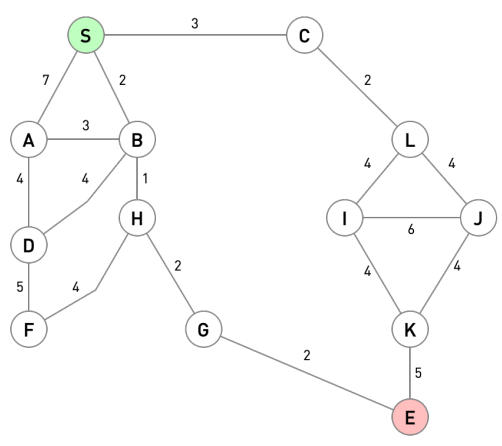

In [37]:
Image('./assets/graph2.png')

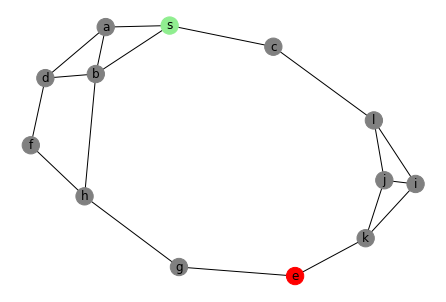

In [38]:
draw_graph(g, 's', 'e')

## Dijkstra

In [39]:
def dijkstra(graph, start, goal):
    q = [(start, [start], 0)]
    [('s', ['s'], 0)]
    done = set()
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            print("Cost: ", h[2])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1] and node[0] not in done:
                    e_filter.append(node)
            e = [(e_final[0], h[1] + [e_final[0]], h[2] + e_final[1]) for e_final in e_filter]
            done.add(h[0])
            q = sorted(e + r, key=lambda tup: (tup[2], tup[0]))

In [40]:
dijkstra(g, 's', 'e')

Total iterations:  9
Path:  ['s', 'b', 'h', 'g', 'e']
Cost:  7


## A*

In [41]:
heuristics = {
    's': 10,
    'a': 9,
    'b': 7,
    'c': 8,
    'd': 8,
    'e': 0,
    'f': 6,
    'g': 3,
    'h': 6,
    'i': 4,
    'j': 4,
    'k': 5,
    'l': 6
}

In [42]:
def a_star(graph, start, goal, heuristics):
    q = [(start, [start], 0, heuristics[start], 0 + heuristics[start])]
    done = set()
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            print("Cost: ", h[2])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1] and node[0] not in done:
                    e_filter.append((node[0], node[1], heuristics[node[0]]))
            e = [(e_final[0], h[1] + [e_final[0]], h[2] + e_final[1], e_final[2], h[2] + e_final[1] + e_final[2]) for e_final in e_filter]
            done.add(h[0])
            q = sorted(e + r, key=lambda tup: (tup[4], tup[3]))

In [43]:
a_star(g, 's', 'e', heuristics)

Total iterations:  5
Path:  ['s', 'b', 'h', 'g', 'e']
Cost:  7


In [44]:
def manhattan_distance(start, goal):
    # start and goal are tuples (x, y)
    return abs(start[0] - goal[0]) + abs(start[1] - goal[1])